In [8]:
%matplotlib inline

These examples have been adapted from those in http://www.scikit-learn.org

See also http://scikit-learn.org/stable/tutorial/statistical_inference/index.html#stat-learn-tut-index

# K nearest neighbours

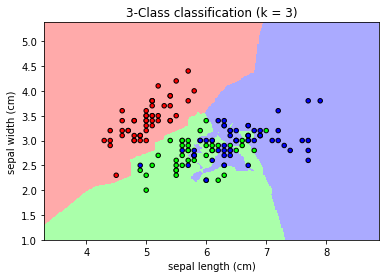

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
cols = iris['feature_names'][:2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold =  ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

n_neighbors = 3
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"% (n_neighbors))

plt.show()

#### Exercise
Modify this code to 
- plot the result of using 5, 10 and 30 nearest neighbours.
- by default, KNeighborsClassifier uses the k closest samples, no matter how close each of them are. Use a weigth function for prediction. 
- plot the KNN for $K=5$ and every pair of features

# Decission trees

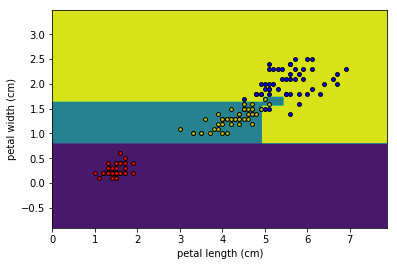

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
pair = [2,3]

# We only take the two corresponding features
iris = load_iris()

X = iris.data[:, pair]
y = iris.target

# Train
clf = DecisionTreeClassifier().fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z)

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], edgecolor='black', s=15)
plt.show()

#### Exercise
- Plot the decission tree of every pair of variables

#### Exercise
the following command splits the sample in two subsamples: train and test. Adapt the previous code to:
1. use the train set to fit a decision tree. 
2. plot the test sample in the plot. 
3. use the learn decision tree to predict the class of the test sample. How many of them are correctly classified?

#### Exercise
Adapt the previuos code to use the random forest classifier

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)